In [1]:
!pip install newsapi-python

In [16]:
import pandas as pd
import numpy as np
from datetime import *
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='6f1674b5eb524fe2ae9c0beb51a528d2')

*Data Retrieval*

In [17]:
#get a list of news sources we want
sources = newsapi.get_sources()
sources_list = []

for source in sources['sources']:
    #we only want general news sources and want to filter out other categories(e.g. sports, travel, etc.)
    if source['category'] == 'general':
        sources_list.append(source['id'])

print(len(sources_list))
sources_list

75


['abc-news',
 'abc-news-au',
 'aftenposten',
 'al-jazeera-english',
 'ansa',
 'ary-news',
 'associated-press',
 'axios',
 'bbc-news',
 'bild',
 'blasting-news-br',
 'breitbart-news',
 'cbc-news',
 'cbs-news',
 'cnn',
 'cnn-es',
 'der-tagesspiegel',
 'el-mundo',
 'focus',
 'fox-news',
 'globo',
 'google-news',
 'google-news-ar',
 'google-news-au',
 'google-news-br',
 'google-news-ca',
 'google-news-fr',
 'google-news-in',
 'google-news-is',
 'google-news-it',
 'google-news-ru',
 'google-news-sa',
 'google-news-uk',
 'goteborgs-posten',
 'independent',
 'infobae',
 'la-gaceta',
 'la-nacion',
 'la-repubblica',
 'le-monde',
 'lenta',
 'liberation',
 'msnbc',
 'national-review',
 'nbc-news',
 'news24',
 'news-com-au',
 'newsweek',
 'new-york-magazine',
 'nrk',
 'politico',
 'rbc',
 'reddit-r-all',
 'reuters',
 'rt',
 'rte',
 'rtl-nieuws',
 'sabq',
 'spiegel-online',
 'svenska-dagbladet',
 'the-american-conservative',
 'the-globe-and-mail',
 'the-hill',
 'the-hindu',
 'the-huffington-post',


In [18]:
#retrieve news that mention Palestine
query = 'palestine'
page = 1
page_size = 100

def get_response_json(query, source, page_size,page):
    response_json = newsapi.get_everything(q=query,
                    language='en',
                    #for this stage, we will get news articles from the Oct 7th incident, until today(Oct 24th)
                    from_param='2023-10-07',
                    to= str(date.today()),
                    sources = source,
                    page_size=page_size,
                    page=page,
                    sort_by='relevancy')
    return response_json

results = []

for x in range(50):
    results.append(get_response_json(query, sources_list[x], page_size, page))


In [19]:
#view what the results look like
results

[{'status': 'ok',
  'totalResults': 45,
  'articles': [{'source': {'id': 'abc-news', 'name': 'ABC News'},
    'author': 'Kiara Alfonseca',
    'title': 'Timeline: The long history of the Israeli-Palestinian conflict',
    'description': 'The Hamas terrorist attack on Israel this weekend comes amid the backdrop of a longstanding history of conflict over land and independence that has plagued the region.',
    'url': 'https://abcnews.go.com/International/timeline-long-history-israeli-palestinian-conflict/story?id=103875134',
    'urlToImage': 'https://i.abcnewsfe.com/a/9b776425-a63d-4cd1-864a-4676010ba579/israel-oslo-agreement-war-moe-gty-231011-020_1697056810352_hpMain_16x9.jpg?w=992',
    'publishedAt': '2023-10-13T16:03:36Z',
    'content': 'The Hamasterrorist attack on Israel this weekend comes amid the backdrop of a longstanding history of conflict over land and independence that has plagued the region.\r\nThe early 1900s: British promot… [+6592 chars]'},
   {'source': {'id': 'abc-n

In [14]:
!pip install wordcloud

     |████████████████████████████████| 161 kB 3.4 MB/s eta 0:00:01


In [25]:
!pip install --upgrade pip 

!pip install --upgrade Pillow

     |████████████████████████████████| 2.1 MB 3.2 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.3 MB/s eta 0:00:0000:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [7]:
import matplotlib.pyplot as plt

In [22]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 5.5 MB/s eta 0:00:0000:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


Text Analysis

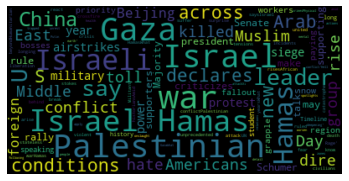

Timeline: The long history of the Israeli-Palestinian conflictPalestinian civilians suffer in Israel-Hamas crossfire as death toll risesAfrican leaders react as Israel declares war on HamasWhat is Hamas? Militant group behind surprise Israel attack has ruled Gaza for yearsWhat we know about the Americans killed in the Israel-Hamas warHamas 'Day of Rage' protests break out in Middle East and beyondHumanitarian crisis in Gaza an 'unprecedented catastrophe,' UN saysIsrael-Gaza conflict stokes tensions as violent incidents arise in the U.S.Palestinians are 'stateless' but united by longing for liberation, say historiansAmid Israel-Hamas war, Muslim and Arab Americans fear rise in hate crimesPhysical and mental health toll on people trapped in war zones amid Israel conflict'Hell on earth': Israel unrest spotlights dire conditions in GazaWhat are the rules of war? And how do they apply to Israel's actions in Gaza?Gaza conditions worsen following Israeli onslaught after Hamas attackXi, Putin 

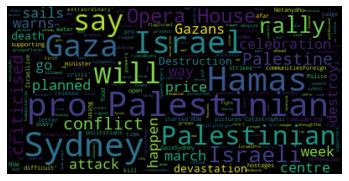

Destruction, death and devastation. Israel, Palestine conflict in pictures'Catastrophic crisis': NSW politicians release open letter supporting Palestinian communitiesForeign minister says 'very difficult' to judge from afar, as Israel vows to cut off food and water to GazaSydney pro-Palestine rally criticised for 'celebration' of attack on IsraelLive: Hamas warns it will kill hostages every time Israel strikes as Netanyahu says offensive has 'only started'NSW Police considering using 'extraordinary' powers at planned Sydney pro-Palestinian rallyCharges laid after man allegedly spat on, assaulted at Sydney Opera House pro-Palestinian rallySydney pro-Palestinians rally criticised for 'celebration' of attack on IsraelPro-Palestinian march to go ahead in Sydney as premier warns of 'zero tolerance' for hate speech'Where can we go?': The Gazans who refuse to leave their homes despite the risksMinns says planned pro-Palestinian rally will not be allowed to 'commandeer Sydney streets'Local ma

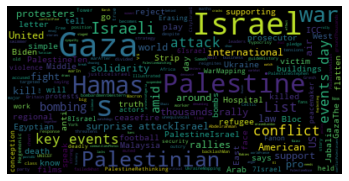

Erasing PalestineIsrael-Palestine conflict and the Gaza WarMapping protests held in solidarity with PalestineIsrael and Hamas war: What to know on day 4 after surprise attackIsrael-Hamas war: List of key events, day 8Israel-Hamas war: List of key events, day 6Israel-Hamas conflict: List of key events, day 2 after surprise attackIsrael-Hamas war: List of key events, day 7Israel-Hamas conflict: List of key events, day 3 after surprise attackIsrael-Gaza war: Which international actors can play peacemaker?Fanon’s conception of violence does not work in PalestineRethinking Palestine-Israel: Hegemonic security vs true justiceIsrael flattens Palestine Tower amid deadly Gaza bombardmentWestern leaders accused of hypocrisy over response to Palestine, UkraineMapping the Israel-Palestine war, major events on the groundThousands of protesters chant ‘Free Palestine’ in New York CityIsrael-Hamas war: Why is Africa divided on supporting Palestine?Celtic fans pledge ‘unequivocal support’ for Palestine

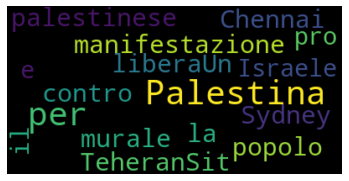

A Sydney manifestazione per la Palestina liberaUn murale per il popolo palestinese a TeheranSit-in a Chennai contro Israele e pro Palestina


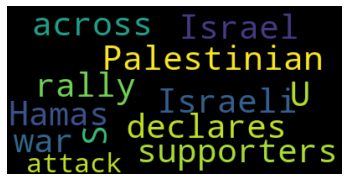

Israeli and Palestinian supporters rally across U.S. as Israel declares war after Hamas attack


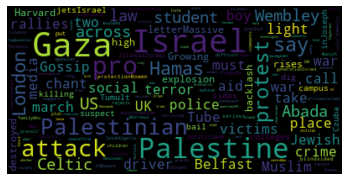

Growing backlash over Harvard students pro-Palestine letterMassive explosion as Gaza high-rises destroyed by jetsIsrael and Gaza on campus: Tumult at US colleges as two sides dig inJoseph Czuba: No bail for suspect in killing of Muslim boy in IllinoisIsrael-Gaza: French Jewish politicians put under police protectionBowen: Israel blindsided by most serious attack in a generationIsrael-Gaza war: UN agencies call for Gaza ceasefire as aid arrivesIsrael faces 'long, difficult war' after Hamas attack from GazaIn Gaza, wounded children with no surviving familyWho's behind Israel-Gaza disinformation and hate online?Wembley silence for innocent victims in Israel and Palestine - FABayern Munich say Noussair Mazraoui 'rejects terror and war' after pro-Palestine social media postDid Iran support plan for attack on Israel?Man charged over racist comments at pro-Palestine rally'Humanity must prevail' in Israel-Gaza conflict - SalahAlgeria to host Palestine football internationalsPolice investigate 

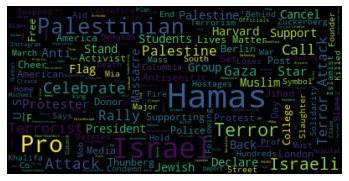

WATCH: 'Allah hu Akbar!' Pro-Palestine Protesters Rally Outside Israeli Embassy in London, Clash with PoliceEurope Split on Terror: Brussels Backtracks, Won't Suspend Aid Payments to PalestineGermany Suspends Aid to Palestine as Berlin Launches Review of All Humanitarian Support PaymentsHamas Massacre Sparks Pro-Palestine, Anti-Israel Demonstrations on U.S. College Campuses: 'Israel, Go to Hell!''Students for Justice in Palestine' Plans 'Day of Resistance'; Says Israeli Civilians Legitimate TargetsChina Demands Palestinian State, Blames U.S. for Hamas Slaughter in Israel‘Death to Israel, Death to America’: Iran Throws Street Party to Celebrate Palestinian Terror SpreeChaos in Berlin: 65 Police Officers Injured as Pro-Palestine Activists Riot, Set Fires During Banned ProtestReport: Democratic Socialists of America to Rally, Cheer Hamas Terrorist Attack on Israel'For Palestine' -- Asylum Seeker Arrested in Britain over Alleged Terror Attack, Details Being Kept From Public: ReportBlackbur

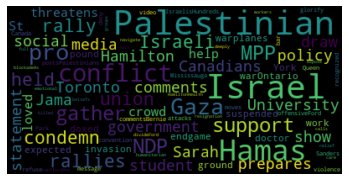

Israeli warplanes pound Gaza. A ground invasion is expected. Does Hamas have an endgame?York University condemns statement by 3 student unions on Israel-Hamas warOntario doctor suspended from work, doxed after pro-Palestinian social media postsPalestinians deny rallies in Canada glorify violence, but some refuse to condemn Hamas attacks on IsraelisHundreds gather in support of Palestinians at Mississauga rally as Israel prepares Gaza offensiveFord government moves to bar Hamilton MPP from being recognized at Queen Park after Gaza commentsBernie Sanders shows support for NDP with video message at policy convention in HamiltonHealth-care and relief workers killed in Gaza as humanitarian groups navigate full blockadeAs Canadians react to Israel-Hamas conflict, deeply held beliefs expose an emotional divideFord calls for resignation of Hamilton NDP MPP over comments about Israel-Hamas conflictPro-Palestinian, pro-Israeli rallies draw crowds in Toronto, MississaugaNewfoundlanders with ties 

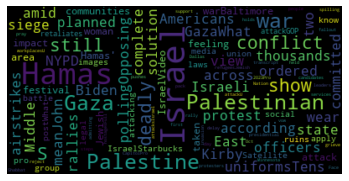

How Americans view the Israel-Palestine conflict, according to pollingOpposing Palestine, Israel rallies planned, all NYPD officers ordered to wear uniformsTens of thousands across Middle East protest Israeli airstrikes on GazaWhat Israel's "complete siege" on Gaza could meanJohn Kirby: Biden still committed to two-state solution amid Israel-Hamas warBaltimore-area Jewish communities feeling impact of Hamas' deadly attack on IsraelVideo shows woman being taken by Hamas at festival in IsraelStarbucks, union in legal battle over pro-Palestinian social media postWhat are the laws of war, and how do they apply to the Israel-Gaza conflict?Who is Hamas? What to know about the group attacking Israel.Satellite images show Gaza ruins as Israel retaliates after Hamas attackGOP presidential candidates reject admitting Palestinian refugeesJewish people grieve and pray in first Shabbat services since attackU.S. leaders vow support for Israel after deadly Hamas attacksIsrael-Hamas war fallout spilli

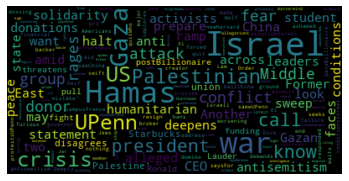

Starbucks disagrees with union over its 'solidarity with Palestine' postBillionaire Ronald Lauder threatens to pull funding if UPenn doesn't do more to fight antisemitism'Deeply ashamed.' Another major UPenn backer halts donations and calls on other Jews to do the sameUPenn crisis deepens: Former trustee calls for president to resign as donors bailChina's Xi seeks swift end to Israel-Hamas conflict, calls for two-state solutionIsrael-Hamas war rages as Gaza waits for aid amid worsening conditionsIsrael-Hamas war rages as crisis deepens in GazaBillionaire CEO demands UPenn leaders quit and donations halt over alleged failure to address antisemitism on campusFrance bans all pro-Palestinian protestsUPenn president made a 'mistake' but shouldn't be forced out, former governor saysFor Palestinian Americans and activists, doxxing is nothing newHarvard and UPenn donors are furious. It may have a financial domino effectWhat would an Israeli ground assault in Gaza look like? Here's what I know 

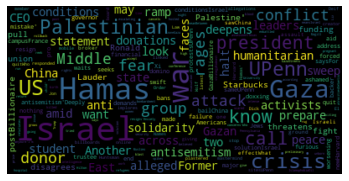

Starbucks disagrees with union over its 'solidarity with Palestine' postBillionaire Ronald Lauder threatens to pull funding if UPenn doesn't do more to fight antisemitism'Deeply ashamed.' Another major UPenn backer halts donations and calls on other Jews to do the sameUPenn crisis deepens: Former trustee calls for president to resign as donors bailChina's Xi seeks swift end to Israel-Hamas conflict, calls for two-state solutionIsrael-Hamas war rages as Gaza waits for aid amid worsening conditionsIsrael-Hamas war rages as crisis deepens in GazaBillionaire CEO demands UPenn leaders quit and donations halt over alleged failure to address antisemitism on campusFrance bans all pro-Palestinian protestsUPenn president made a 'mistake' but shouldn't be forced out, former governor saysFor Palestinian Americans and activists, doxxing is nothing newHarvard and UPenn donors are furious. It may have a financial domino effectWhat would an Israeli ground assault in Gaza look like? Here's what I know 

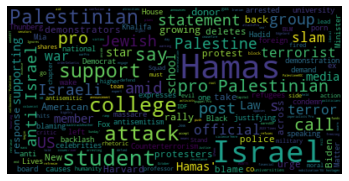

'Fox News Sunday' on October 8, 2023'Times is of the essence' to retrieve hostages: Counterterrorism expert issues urgent warning over Israel warPro-Palestinian school board member opposes honoring Hamas attack victims: 'Ignores the root of the violence'Here's where Students for Justice in Palestine held college protests this weekNYT columnist slams American left for 'justifying Hamas’s atrocities:' 'Edgelord anti-imperialists'Pro-Palestinian student group plans national 'day of resistance,' calls for 'mass mobilization'EU official's announcement freezing aid to Palestinians causes confusion before officials backtrackAnother UPenn donor announces end of financial support after school's response to Hamas terrorist attacksPro-Palestinian activists were told not to engage with media during demonstration, but some defied the orderDeSantis refuses to back off demand that US not accept refugees from PalestineAOC, liberal politicians slam pro-Palestine rally amid growing backlash: 'bigotry an

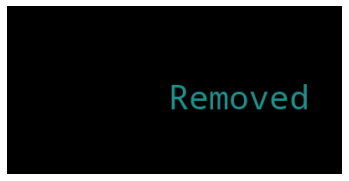

[Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed][Removed]


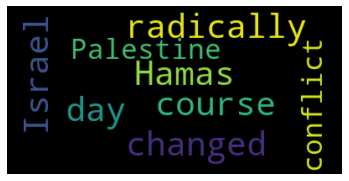

The day Hamas radically changed the course of the Israel-Palestine conflict


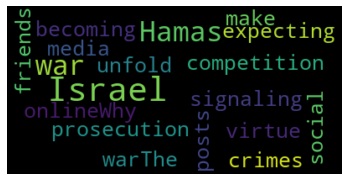

How war crimes prosecution could unfold in the Hamas-Israel warThe Israel-Hamas war is becoming a virtue signaling competition onlineWhy I'm not expecting my friends to make social media posts about Israel


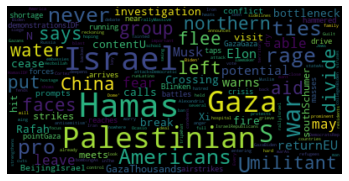

Why Palestinians fear that if they leave northern Gaza they may never be able to returnEU warns Elon Musk of potential investigation over Hamas contentU.N. calls for cease-fire to break bottleneck at Rafah Crossing and get aid into GazaThousands flee northern Gaza as strikes hit the southSchumer meets with China’s Xi during visit to BeijingIsrael-Hamas conflict prompts pro-Palestinian demonstrationsIDF battles to drive out militants, masses forces near GazaGaza taps are running dry as water shortage reaches crisis pointGaza hammered with airstrikes; Blinken arrives in IsraelRepublicans want to ban Palestinian refugees from entering the U.S., but it's already very hard for them to get inThe left faces a reckoning as Israel divides DemocratsRep. Alexandria Ocasio-Cortez condemns 'hatred and antisemitism' at pro-Palestinian rallyIsrael's 'Iron Dome' has never been more important as it fends off Hamas attacksDemocratic lawmaker cuts ties with prominent left-wing group over pro-Palestinian 

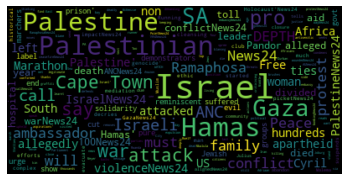

News24 | 'We suffered under apartheid, we show solidarity with Palestine' - Cyril Ramaphosa, ANCNews24 | Pro-Palestine demonstrators in Cape Town urge govt to cut ties with IsraelNews24 | 'They are in prison': US pro-Palestinian marchers call for end of Israeli violenceNews24 | Israel-Hamas war: Jewish groups in SA label the conflict as 'pure evil, reminiscent of the Holocaust'News24 | IN-DEPTH | SA's Israel-Palestine mediation efforts started in 1994 but haven't had much impactNews24 | Cape Town Marathon: Running club suspends man who allegedly attacked woman at pro-Palestine picketNews24 | 'This is ethic cleansing, genocide': Palestinian ambassador decries Israel's calls to evacuate GazaNews24 | IN-DEPTH | South Africa's historical ties with Israel and Palestine are complex, but not non-alignedNews24 | Julius Malema tells Muslim community to abandon ANC due to non-closure of Israeli embassyNews24 | Israel, Palestine will only find peace if 'legitimate aspirations' of Palestinians are

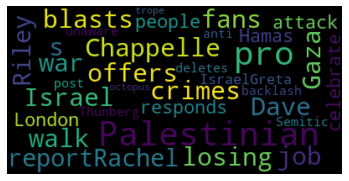

Dave Chappelle fans walk out after he blasts Israel’s ‘war crimes’ in Gaza, pro-Palestinians losing job offers: reportRachel Riley responds as people in London celebrate Hamas attack on IsraelGreta Thunberg deletes pro-Palestinian post after backlash, ‘unaware’ of anti-Semitic octopus trope


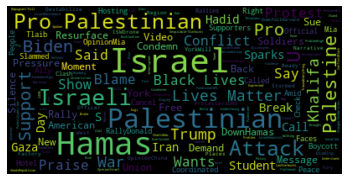

Pro-Palestine and Pro-Israel Rallies Clash in New YorkWill the Israel-Palestine Conflict Destabilize the Region? | OpinionChina's Narrative Places Blame of Israel Conflict on U.S. and West: ISWDrone Factory Stormed by Pro-Palestinian ProtestersDHS Officer Praises Hamas Attacks: 'Ready' for Israel's DownfallHarvard Students Blaming Israel for Hamas Attacks Sparks Fury: 'Despicable'Starbucks Sues Pro-Hamas Baristas' UnionDemocrats Have a Palestinian ProblemHigh Risk of Violence at Protests Over Israel and the Palestinians | OpinionIsrael Map Shows Areas Hit by Fire Attacks From GazaGreta Thunberg's Pro-Palestine Message Turns HeadsRepublican Who Brought Gun to Pro-Palestine Protest Broke the LawStarbucks Threatens to Sue Union That Expressed Support for Palestine Over IsraelVideo Shows Moment Israel Obliterates High-Rise Palestine Tower in GazaClub Uses Video of Israeli Soldiers Being Beaten for Palestine FundraiserNFL's Moment of Silence for Israel Interrupted by 'Free Palestine' Chants

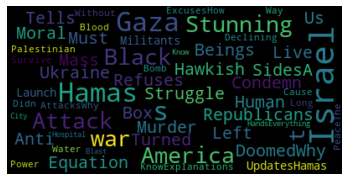

Your Moral Equation Must Have Human Beings on Both SidesA Left That Refuses to Condemn Mass Murder Is DoomedWhy Are Anti-Ukraine Republicans So Hawkish on Israel?What the Black Struggle Tells Us About the Israel-Hamas war‘Gaza Has Been Turned Into a Black Box’Israel at War After Stunning Hamas Attack: Live UpdatesHamas Militants Launch Stunning Attack In Israel: What We KnowExplanations Are Not ExcusesHow Long Can Gaza Survive Without Water?No, America’s Declining Power Didn’t Cause Hamas’s AttacksWhy Israel Can’t Bomb Its Way to PeaceThe Palestinian Blood on America’s HandsEverything We Know About the Gaza City Hospital Blast


In [20]:
#Generate Word Clouds based on the articles
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(len(results)):
    combinedtext = ''
    for j in results[i]['articles']:
        combinedtext += j['title'] + ''

    if combinedtext != '':
        # Create and generate a word cloud image:
        wordcloud = WordCloud(max_font_size=40).generate(combinedtext)

        # Display the generated image:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        print(combinedtext)

In [28]:
#I want to take a step further and analyze the sentiment in each article
#for simplicity, we will use TextBlob
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

#Iterate through articles and analyze sentiment
positive_articles = []
neutral_articles = []
negative_articles = []

positive_count = 0
neutral_count = 0
negative_count = 0

for i in range(len(results)):
    combined_text = ''
    for article in results[i]['articles']:
        combined_text += article['title'] + ' '
        sentiment = analyze_sentiment(combined_text)
        if sentiment == 'Positive':
            positive_count +=1
            positive_articles.append(combined_text)
        elif sentiment == 'Negative':
            negative_count += 1
            negative_articles.append(combined_text)
        else:
            neutral_count += 1
            neutral_articles.append(combined_text)


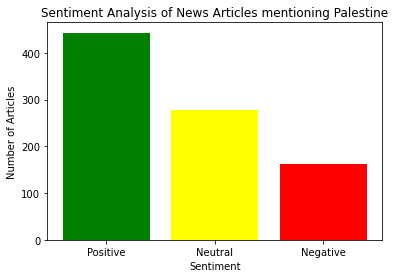

In [29]:
import matplotlib.pyplot as plt

#categories and counts
categories = ['Positive', 'Neutral', 'Negative']
counts = [positive_count, negative_count, neutral_count]

#Create bar chart
plt.bar(categories, counts, color=['green', 'yellow', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.title('Sentiment Analysis of News Articles mentioning Palestine')
plt.show()

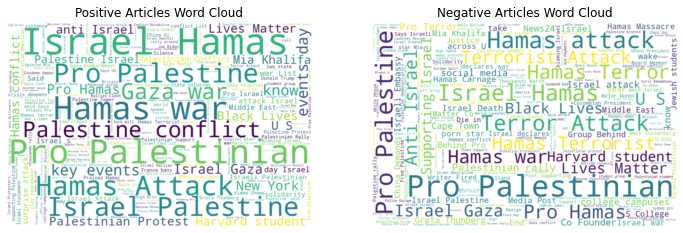

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#create word clouds for positive and negative articles
positive_text = " ".join(positive_articles)
negative_text = " ".join(negative_articles)

positive_wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(negative_text)

#plot word clouds
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Articles Word Cloud')

plt.subplot(1,2,2)
plt.imshow(negative_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Negative Articles Word Cloud')

plt.show()